# The first homework assignment for CSE427

## Notebook Set Up
click the `File` and select the `save a copy in drive`, then rename the notebook as `CSE427-Assignment1-YOUR_NETID` and then you can edit the notebook

## Submission Instruction
Before you submit this assignment click the `Runtime` select the `Restart and run all` to make sure everything is fine. 

Create a share link with editing permission and submit the link to canvas.

## Resource
If you have some problems about the usage of pandas you can check the [pandas guide](https://pandas.pydata.org/docs/user_guide/index.html).

If you don't know about the markdown, you cen check the [basic Syntax](https://www.markdownguide.org/basic-syntax/). 

You can use latex for the math or write the answer by hand and then upload the picture. 

You can also write by hand and then use [mathpix](https://mathpix.com) to convert to latex. mathpix is very powerful


In [ ]:
!pip3 install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Download the data you will use in this assigment

In [ ]:
!gdown 1fqO7YgnyvWD3pA-BgCLATOKIlf_TTOII
!gdown 1pJ-BD_y630AfhyGlQDJwgCA_WjLndBc2

Downloading...
From: https://drive.google.com/uc?id=1fqO7YgnyvWD3pA-BgCLATOKIlf_TTOII
To: /content/Febrile_Seizures.txt
100% 325M/325M [00:01<00:00, 186MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pJ-BD_y630AfhyGlQDJwgCA_WjLndBc2
To: /content/problem2_raw_data.txt
100% 9.90k/9.90k [00:00<00:00, 3.68MB/s]


## Problem 0 - Reflection  

### 1. Describe how to convert raw genotype data into a numeric matrix of genotypes. (1 point)

Your answer: Take the minor allele (this is somewhat arbitrary, but picking the allele that has the lower count leads to a more sparse matrix that is easier to compute). If the genotype is dominant/dominant, aka there is no minor allele present, assign it a value of 0. If it is dominant recessive, assign it a value of 1. Finally, if it has two intances of the minor allele, assign it a value of 2. Do this for every genotype.


### 2.Name one difference between linear regression and logistic regression. (1 point)

Your answer: Logistic regression allows us to assign data categorically, and would be better used in a GWAS study where we are trying to predict a binary outcome. Linear regression assigns a more continuous output for the given input.

### 3.What is the Bonferroni correction? Why we need to do Bonferroni correction in a real world analysis? (1 point)
Your answer: The Bonferroni correction reassigns a p value to a much smaller value according to how many tests were done. This is used because the probability of a false positive on one test is 0.05 with a p value of 0.05, and given a large number of tests the probability of making at least 1 error is very close to 1. This corrects for these false positives by essentially making it harder to reject the null hypothesis.


## Problem 1 - Logistic Regression
Recall the logistic regression model
$$
p\left(y_i=1 \mid \mathbf{x}, \mathbf{w}\right)=\frac{\exp \left(w_0+\ldots+x_{i j} w_j\right)}{1+\exp \left(w_0+\ldots+x_{i j} w_j\right)}\\
p\left(y_i=0 \mid \mathbf{x}, \mathbf{w}\right)=1-p\left(y_i=1\mid \mathbf{x},\mathbf{w}\right)=1-\frac{\exp \left(w_0+\ldots+x_{i j} w_j\right)}{1+\exp \left(w_0+\ldots+x_{i j} w_j\right)}
$$
Starting from the likelihood function for this model, derive the update equation for fitting parameters of logistic regression. In other words, at each time step in a gradient descent algorithm, what equation is used to update the weights of the model?
Show all steps, and use text to describe equations as needed. Hint: look at the lecture slides. 

Include the following steps:
1. Write the expression for full likelihood of data under the model for $\mathrm{N}$ examples. (2 points)
2. Write down the objective function that is minimized. Hint: Take the negative of the log likelihood function, and simplify the resulting function. (2 points)
3. Recall that in gradient descent, we iteratively solve for an update parameter at time t, $w_j^t=w_j^{t-1}-\alpha\frac{\partial{LL}}{\partial{w_j}}$ Write the update rule for gradient descent. That is, show $\frac{\partial{LL}}{\partial{w_j}}$ for the logistic regression objective function. (3 points)

## Your answer:

$L(y|x,w) = $ $ \prod\limits_{i}^{N} (\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}})^{y_i}(1-\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}})^{(1-y_i)}$

$-log(L(y|x,w)) = $ $ -log(\prod\limits_{i}^{N} (\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}})^{y_i}(1-\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}})^{(1-y_i)})$

$-LL(y|x,w) = $ $ -\sum\limits_{i}^{N} y_i(log(\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}})) + (1-y_i)(log(1-\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}}))$

$-LL(y|x,w) = -\sum\limits_{i}^{N} y_i(log(e^{w_0+...+x_{ij}w_j})-log({1+e^{w_0+...+x_{ij}w_j}})) + (1-y_i)(log(\frac{1+e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}}-\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}}))$

$-LL(y|x,w) = -\sum\limits_{i}^{N} y_i((w_0+...+x_{ij}w_j)-log({1+e^{w_0+...+x_{ij}w_j}})) + (1-y_i)(log(\frac{1}{1+e^{w_0+...+x_{ij}w_j}}))$

$-LL(y|x,w) = -\sum\limits_{i}^{N} y_i((w_0+...+x_{ij}w_j)-log({1+e^{w_0+...+x_{ij}w_j}})) + (1-y_i)(log(1) - log({1+e^{w_0+...+x_{ij}w_j}}))$

$\frac{\partial LL}{\partial w_j} = \sum\limits_{i}^{N} y_i(x_{ij}-\frac{1}{1+e^{w_0+...+x_{ij}w_j}}*e^{w_0+...+x_{ij}w_j}*x_{ij}) + (1-y_i)(-\frac{1}{1+e^{w_0+...+x_{ij}w_j}}*e^{w_0+...+x_{ij}w_j}*x_{ij})$

$\frac{\partial LL}{\partial w_j} = \sum\limits_{i}^{N} y_ix_{ij}(1-\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}}) + (1-y_i)x_{ij}(-\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}})$

$\frac{\partial LL}{\partial w_j} = \sum\limits_{i}^{N} y_ix_{ij}-y_ix_{ij}\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}} - x_{ij}\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}} + y_ix_{ij}\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}}$

$\frac{\partial LL}{\partial w_j} = \sum\limits_{i}^{N} x_{ij}(y_i-\frac{e^{w_0+...+x_{ij}w_j}}{1+e^{w_0+...+x_{ij}w_j}})$

## Problem 2 - Linear Regression and Logistic Regression

In this problem, we will use real data to fit linear regression and logistic regression models. The data is in the file `problem2_raw_data.txt`. The first column is the continuous phenotype and the second is the genotype $TA, AA, TT$. 



### Problem 2 (a) - fit Linear Regression
Perform the following step and show your code:
1. Load the data into a pandas dataframe. (1 point)
2. Convert the genotype into a numeric value by counting number of the minor allele (1 point)
3. Use a scatter plot to visualize the data. Plot genotype value on x-axis and phenotype value on y-axis.(1 point)
4. Next, fit a linear regression model to the data to get the values for the unknown parameters. Show your code. (1 point)
5. Finally, write down the values for the two parameters. (1 point) 

In [ ]:
import pandas as pd
import numpy as np

# load raw data
raw_data = pd.read_csv('./problem2_raw_data.txt', sep='\t', header=0)

raw_data.head(5)

,PHENO,GENO
0,1.8844,TT
1,1.8472,TT
2,2.2440,AT
3,2.2346,AT
4,1.8919,TT


In [ ]:
# find the minor allele
raw_data['GENO'].value_counts()

TT    646
AT    315
AA     39
Name: GENO, dtype: int64

In [ ]:
# Encode the Genotype into 0, 1, 2 by counting the minor allele
# Finish Your Code
raw_data['X']  = raw_data['GENO'].map({'TT':0, 'AT':1, 'AA':2})  # TODO 


Text(0, 0.5, 'PHENO')

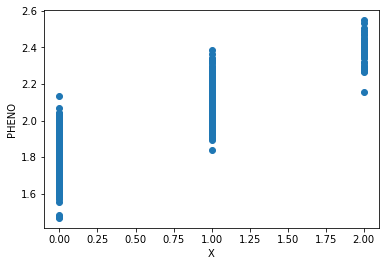

In [ ]:
# scatter plot for X and PHENO

import matplotlib.pyplot as plt

# use plt.scatter 
plt.scatter(raw_data['X'],raw_data['PHENO'])
plt.xlabel('X')
plt.ylabel('PHENO')

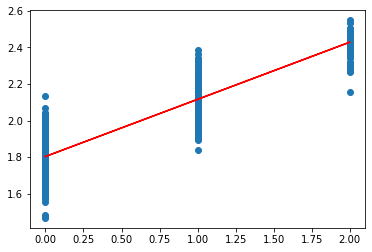

In [ ]:
# Fit a linear regression model

import sklearn.linear_model as lm

# Finish your code here
X = raw_data['X'].values.reshape(-1, 1)
y = raw_data['PHENO'].values.reshape(-1, 1)

# FINISH YOUR CODE Hint: Use lm.linearRegression
model = lm.LinearRegression()

# FINISH YOUR CODE Hint: Use model.fit() 
model.fit(X,y)

# Plot the fitted line

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')

In [ ]:
# print the model parameters
print(model.coef_, model.intercept_)

[[0.31311291]] [1.80289853]


### Explain your result here: YOUR ANSWER

### Problem 2 (b) - fit Logistic Regression

In this equestion, we use the same data as in Question (a) to fit logistic regression models, and derive the p-value for association between SNP genotype and the phenotype. Please show work for each step below. Look below for hints. 

1. Convert the phenotype data into binary values (0 or 1) by setting the threshold to the mean of the phenotype. (1 point)

2. Fit two separate logistic regression models to the data, one that use the SNP values as a covariate (Full Model) and one that does not use the SNP information, and only includes an intercept term (Reduced Model). Then show  the likelihood values according to the Full Model and the Reduced Model. (1 point)

3.  Compute the value of the LRT test-statistics (called $\lambda$ below). (1 point)

4. Compute the p-value using LRT test given the likelihood. (1 point)

5. Is the result statistically significant? why? (1 point)



\\
Data likelihood according to the Full Model:$$
L(\mathbf{y} \mid X, \mathbf{w})=\prod_i\left(\frac{e^{w_0+w_1 x_i}}{1+e^{w_0+w_1 x_i}}\right)^{y_i}\left(1-\frac{e^{w_0+w_1 x_i}}{1+e^{w_0+w_1 x_i}}\right)^{\left(1-y_i\right)}
$$

Data likelihood according to the Reduced Model:
$$
L(\mathbf{y} \mid w)=\prod_i\left(\frac{e^{w_0}}{1+e^{w_0}}\right)^{y_i}\left(1-\frac{e^{w_0}}{1+e^{w_0}}\right)^{1-y_i}
$$

The Likelihood Ratio Test (LRT) is a statistical test used to compare two models. The test statistic is two times the difference in *log-likelihoods* between the two models (Full and Reduced models). The test statistic is distributed as a chi-square distribution with degrees of freedom equal to the difference in the number of parameters between the two models. The test statistic is calculated as follows:

$$
\begin{aligned}
\mathrm{LR} &=2\times\mathrm{log} \frac{L\left(\mathbf{y} \mid \mathbf{w}_{\mathrm{full}}\right)}{L\left(\mathbf{y} \mid \mathbf{w}_{\mathrm{reduced}}\right)} \\
&=2\times \mathrm{log} \frac{\prod_{i=1}^{N} p\left(y_{i} \mid \mathbf{x}_{i}, \mathbf{w}_{\mathrm{full}}\right)}{\prod_{i=1}^{N} p\left(y_{i} \mid \mathbf{x}_{i}, \mathbf{w}_{\mathrm{reduced}}\right)} \\
\end{aligned}
$$

In [ ]:
def predict_prob(x, coef, intercept):
    # predict the probability of PHENO=1
    # Finish your code here
    exp = intercept + (coef * x)
    return np.exp(exp) / (1 + np.exp(exp))

In [ ]:
# convert the continuous Phenotype into 0, 1 (0: below mean, 1: above mean) as the colum Y
mean = raw_data["PHENO"].mean()
raw_data['Y'] = list(map(lambda x: 0 if x < mean else 1, raw_data['PHENO']))


# Fit a logistic regression model
Y = raw_data['Y'].values.reshape(-1,1)

# FINISH YOUR CODE Hint:use lm.LogisticRegression() and full_model.fit(X, Y)
full_model = lm.LogisticRegression()
full_model.fit(X, Y.ravel())

print('the fitted full model parameters:', full_model.coef_, full_model.intercept_)

# Calculate the log-likelihood of the fitted model

full_model_predict_prob = predict_prob(X, full_model.coef_, full_model.intercept_)

# Calculate the log-likelihood of the fitted model
lnL_fullmodel = np.sum(Y * np.log(full_model_predict_prob) + (1-Y)*np.log(1-full_model_predict_prob))

the fitted full model parameters: [[5.37550594]] [-1.99463747]


In [ ]:
Null = np.zeros((X.shape))

# FINISH YOUR CODE Hint:use lm.LogisticRegression() and full_model.fit(Null, Y)
reduced_model = lm.LogisticRegression()
reduced_model.fit(Null, Y.ravel())
print('the fitted reduced model parameters:', reduced_model.coef_, reduced_model.intercept_)

the fitted reduced model parameters: [[0.]] [-0.31866964]


In [ ]:
# Calculate the log-likelihood of the reduced model
# The reduced model only has an intercept term

reduced_model_predict_prob = predict_prob(X, reduced_model.coef_, reduced_model.intercept_)

lnL_reducedmodel = sum(Y * np.log(reduced_model_predict_prob) + (1-Y)*np.log(1-reduced_model_predict_prob))

# Calculate the likelihood ratio test statistic
lamda = 2*(lnL_fullmodel - lnL_reducedmodel)

In [ ]:
print(lamda)

[854.28304056]


In [ ]:
# Chi-square distribution with 1 degree of freedom
from scipy.stats import chi2
p_value = 1 - chi2.cdf(lamda, 1)

In [ ]:
# the p-value might be very small even equal to zero due the numerical precision
print('p-value: ', p_value)

p-value:  [0.]


###Is the result statistically significant? why? (1 point)
Yes, because the p value is less than 0.05. This means that we would reject the null hypothesis, meaning that the result is statistically significant.

## Problem 3 - P-value threshold and Boneferroni correction
In this problem, we provide a recent published GWAS dataset - [genome-wide meta-analysis of febrile seizures published in Skotte et al. 2022 ](https://www.danishnationalbiobank.com/gwas/febrile-seizures-2022)

The summary statistics file contains results from GWAS discovery analysis of febrile seizures (n=4502) versus controls (n=51049). The file provides information on chromosome, genomic position (NCBI build 37), rsID, effect allele, other allele, odds ratio for the effect allele, standard error, and P value, at approximately 6.8 million variants passing quality control.

A febrile seizure, also known as a fever fit or febrile convulsion, is a seizure associated with an increased body temperature but without any intracranial infection. They most commonly occur in children between the ages of 6 months and 5 years with a higher incidence around 18 month of age. There are two types: simple febrile seizures and complex febrile seizures. Febrile seizures are triggered by fever, typically due to a viral infection. The underlying mechanism is not fully known, but it is thought to involve genetics, environmental factors, brain immaturity, and inflammatory mediators.

In [ ]:
# load the GWAS data
GWAS_data = pd.read_csv('./Febrile_Seizures.txt', sep=' ', header=0)
GWAS_data.head(5)

,chromosome,pos,rsid,eff_allele,alt_allele,BETA,SE,P
0,1,100000012,rs10875231,T,G,-0.0196,0.0262,0.45540
1,1,100000827,rs6678176,T,C,0.0106,0.0246,0.66530
2,1,100000843,rs78286437,T,C,-0.1132,0.0486,0.01972
3,1,100000989,rs146963890,A,ATC,-0.1085,0.0497,0.02908
4,1,100001201,rs76909621,T,G,-0.0011,0.0379,0.97730


In [ ]:
GWAS_data['-logp'] = -np.log10(GWAS_data['P']) # Hint Use np.log10()

In [ ]:
# Calculate the cumulative position
running_pos = 0

cumulative_pos = []

for chrom, group_df in GWAS_data.groupby('chromosome'):  
    cumulative_pos.append(group_df['pos'] + running_pos)
    running_pos += group_df['pos'].max()
    
GWAS_data['cumulative_pos'] = pd.concat(cumulative_pos)


#### 3 (a) - How many significant SNPs were found in the above analysis? Use an uncorrected p-value of 0.05. Is the result reasonable? (2 points)
We found 409,920 significant SNPs. This is not reasonable, because it is a very high percentage of our total SNPs. This would mean that almost all of them would be considered significant to the given phenotype, and would not be helpful to our analysis at all.

In [ ]:
# Finish you analysis here
n_uncorrected = GWAS_data[GWAS_data['-logp'] > -np.log10(0.05)].shape[0]
print('Number of significant SNPs (uncorrected):', n_uncorrected)

Number of significant SNPs (uncorrected): 409920


#### 3 (b) - Bonferroni correction
Recall the Bonferroni method of controlling family wise error rate. 

1. Using the number of hypotheses tested in the above example, calculate the Bonferroni corrected p-value threshold. Show the threshold (1 point)

p_bonferroni ~= 7.353e-9

-log(p_bonferroni) ~= 8.133
2. How many significant SNPs are found using this threshold? Why the number of significant SNPs is different from the uncorrected threshold. (1 point)

Here, we found 492 significant SNPs. This is very different because the cutoff, -log(0.05/m) ends up being much higher than -log(0.05). We have constructed a modified p value using the Bonferroni correction, and therefore raised the threshold that is required for SNPs to be considered significant.

3. Which one is more appropriate for this analysis and why? (2 points)

The corrected number of SNPs is more appropriate for this analysis, because we want to have usable results. The previous number of significant SNPs was far too large to mean anything. Not only that, but using the Bonferroni correct allows for us to account for the false positive errors that are almost guaranteed to have occured.

In [ ]:
# Finish your analysis here

# Bonferroni correction
m = len(GWAS_data)
p_bonferroni = 0.05/m

n_bonferroni = GWAS_data[GWAS_data['-logp'] > -np.log10(p_bonferroni)].shape[0]
print('Number of significant SNPs (Bonferroni):', n_bonferroni)

Number of significant SNPs (Bonferroni): 492


### 3 (c) Visualizing the results using a Manhattan plot
We provide the code for Manhattan plot what you need to do is use the corrected p-value as the threshold and explain the Manhattan plot.
1. Explain what the Manhattan plot is showing (2 points)

The Manhattan plot is showing a plot of the -log(p_value) of each SNP, and the SNPs are ordered in relation to their position on the chromosomes. The black line is the corrected threshold we are using to consider them significant that we decided using the Bonferroni method. 

2. Draw the horizontal line that shows the Bonferroni correctedd threshold on this plot (2 points)

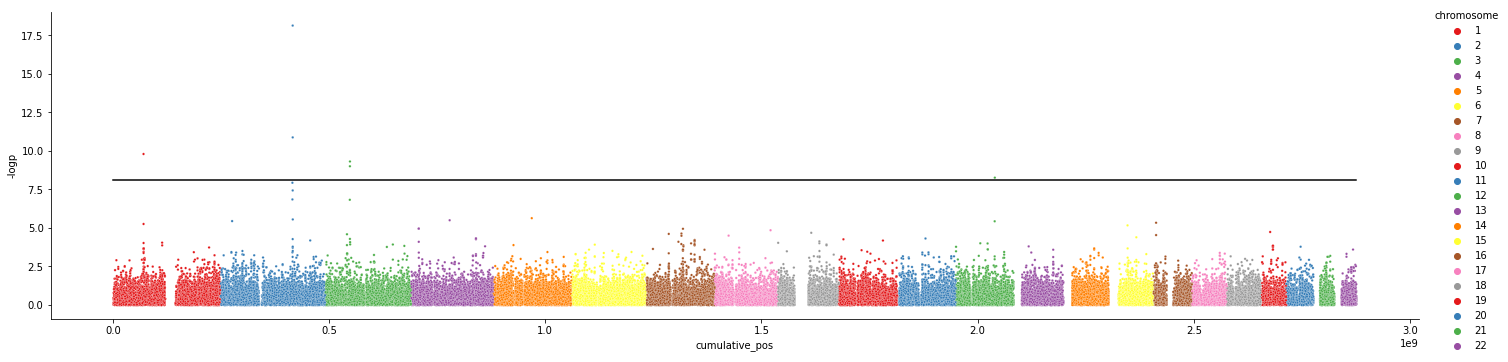

In [ ]:
import seaborn as sns

sns.relplot(
    data = GWAS_data.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    s = 6,
    aspect = 4,
    hue = 'chromosome',
    palette = 'Set1'
)

# plot the line y > 10 
plt.plot([0, GWAS_data['cumulative_pos'].max()], [-np.log10(p_bonferroni), -np.log10(p_bonferroni)], color='black')

### Explain your result:

Here, the dots that are above our black line represent the SNPs that we have determined to be significant. The height of the SNP is the negative log of its p-value. The SNPs whose p-value falls beneath the black line are deemed insignificant to the given phenotype.